### Import Libraries

In [8]:
import numpy as np
import os, sys, cv2, random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.preprocessing import normalize

### Create linear data randomly

In [9]:
n_samples = 5000 # Number of samples to create
X = sorted(np.random.rand(n_samples)) * 5 # Create sorted random samples

# Create 6-dimensional empty vector
linear_y = np.empty((len(X), 6))

# Put same value in every channel of 6-dimensioanl vector
for i in range(linear_y.shape[1]) :
    linear_y[:,i] = X

### Create Non Linear data randomly

In [10]:
n_samples = 5000 # Number of samples to create
X = np.sort(np.random.rand(n_samples)) * 5 # Create sorted random samples

nonlinear_y = np.empty((len(X), 6)) # Create 6-dimensional empty vector

# Put same value in every channel of 6-dimensioanl vector
for i in range(nonlinear_y.shape[1]) :
    if i == 1:
        nonlinear_y[:,i] = np.power(X, 2)
    else :
        nonlinear_y[:,i] = [2*np.cos(15 * np.pi * x ) for x in X]        

nonlinear_y[:,2] = np.abs(nonlinear_y[:,2])

### Create n-dimensional hypershpere

In [11]:
n_samples = 5000 # Number of samples to create
dim = 6 # Dimensionality of data

# Draw random samples from a gaussian distribution
hypersphere = np.random.normal(size=(n_samples, dim))
hypersphere = normalize(hypersphere, 'l2') # L2 normalize the data

### Plot Data

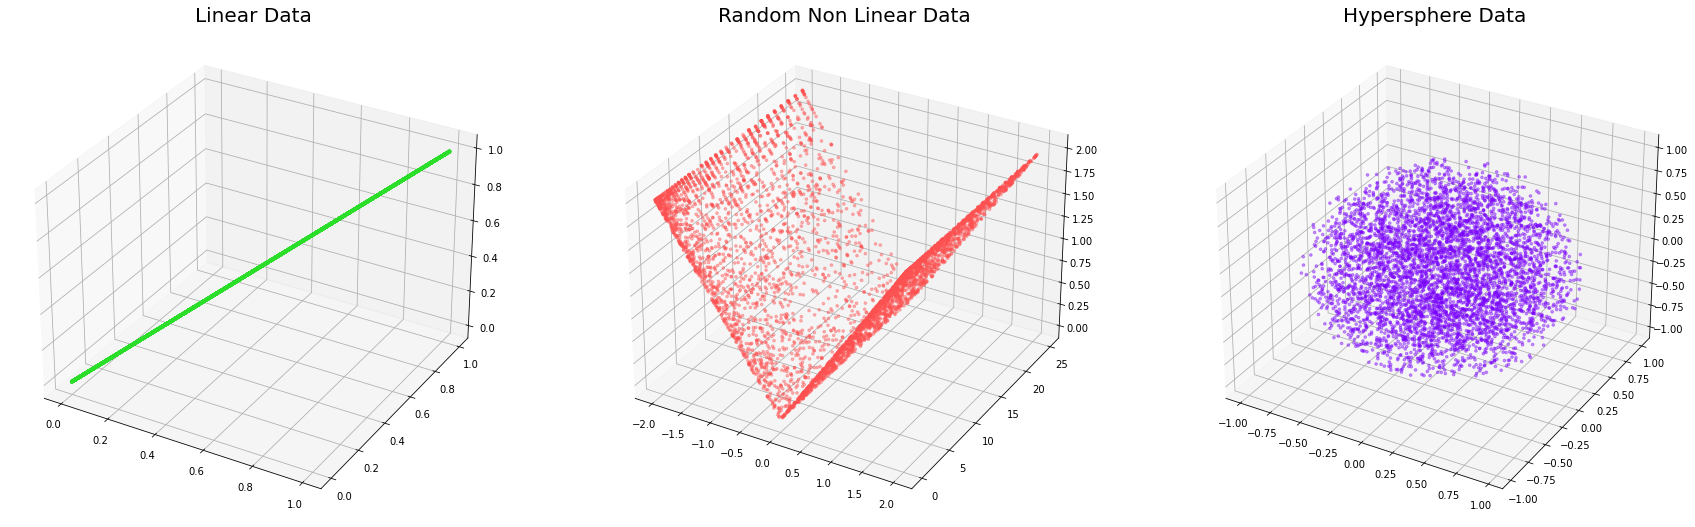

In [12]:
fig = plt.figure(figsize= (30, 20))
ax = fig.add_subplot(131,projection='3d')
ax.scatter(linear_y[:,0], linear_y[:,1], linear_y[:,2], marker= '.', color= '#2ade2a', s= 28, alpha= 0.4)
ax.set_title("Linear Data", fontsize= 20)

ax = fig.add_subplot(132,projection='3d')
ax.scatter(nonlinear_y[:,0], nonlinear_y[:,1], nonlinear_y[:,2], marker= '.', color= '#FF5151', s= 28, alpha= 0.4)
ax.set_title("Random Non Linear Data", fontsize= 20)

ax = fig.add_subplot(133,projection='3d')
ax.scatter(hypersphere[:,0], hypersphere[:,1], hypersphere[:,2], marker= '.', color= '#7900FF', s= 28, alpha= 0.4)
ax.set_title("Hypersphere Data", fontsize= 20)
plt.show()

### Apply PCA

In [13]:
def computePCA(data) :
    
    pca = PCA() # Compute PCA
    data_pca = pca.fit_transform(data) # Fit and transform data
    eigenvalues = pca.explained_variance_ # Get eigenvalues
    eigenvalues = np.round(eigenvalues, 5) # Round off eigenvalues
    
    return data_pca, eigenvalues

linear_pca, linear_eigen = computePCA(linear_y)
nonlinear_pca, nonlinear_eigen = computePCA(nonlinear_y)
hypersphere_pca, hyper_eigen = computePCA(hypersphere)

print("Eigen values of linear data: ", linear_eigen.tolist())
print("Eigen values of random non linear data: ", nonlinear_eigen.tolist())
print("Eigen values of hypersphere data: ", hyper_eigen.tolist())


Eigen values of linear data:  [0.49119, 0.0, 0.0, 0.0, 0.0, 0.0]
Eigen values of random non linear data:  [56.07834, 7.92702, 0.383, 0.0, 0.0, 0.0]
Eigen values of hypersphere data:  [0.17315, 0.17032, 0.16968, 0.16495, 0.16259, 0.15931]


### Plot Principal Components

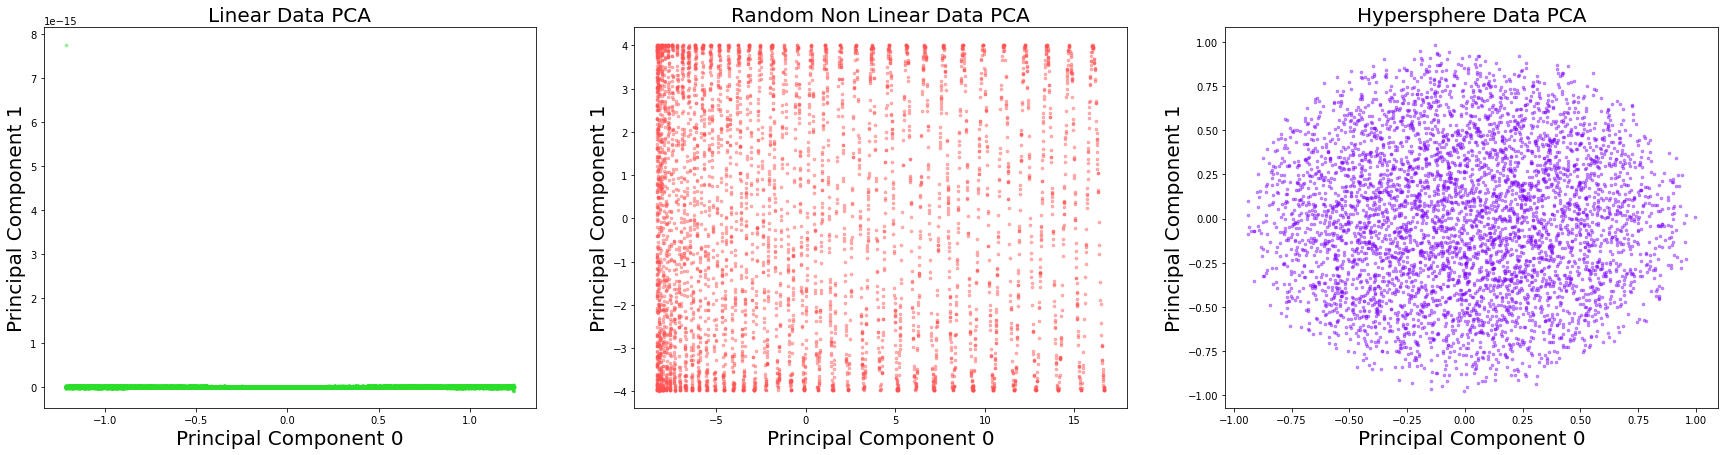

In [14]:
fig = plt.figure(figsize= (30, 7))

ax = fig.add_subplot(131) # PCA linear data
ax.scatter(linear_pca[:,0], linear_pca[:,1], marker= '.', color= '#2ade2a', s= 28, alpha= 0.4)
ax.set_title("Linear Data PCA", fontsize= 20)
ax.set_xlabel("Principal Component 0", fontsize= 20)
ax.set_ylabel("Principal Component 1", fontsize= 20)

ax = fig.add_subplot(132) # PCA random non-linear data
ax.scatter(nonlinear_pca[:,0], nonlinear_pca[:,1], marker= '.', color= '#FF5151', s= 28, alpha= 0.4)
ax.set_title("Random Non Linear Data PCA", fontsize= 20)
ax.set_xlabel("Principal Component 0", fontsize= 20)
ax.set_ylabel("Principal Component 1", fontsize= 20)

ax = fig.add_subplot(133) # PCA hypersphere data
ax.scatter(hypersphere_pca[:,0], hypersphere_pca[:,1], marker= '.', color= '#7900FF', s= 28, alpha= 0.4)
ax.set_title("Hypersphere Data PCA", fontsize= 20)
ax.set_xlabel("Principal Component 0", fontsize= 20)
ax.set_ylabel("Principal Component 1", fontsize= 20)
plt.show()